In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

We read the input first from the clenning csv file

In [10]:
data = pd.read_csv('./heart_clean.csv')
print(data.head())

   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   3     145.0  233.0    1        0    150.0      0      2.3   
1   37    1   2     130.0  250.0    0        1    187.0      0      3.5   
2   41    0   1     130.0  204.0    0        0    172.0      0      1.4   
3   56    1   1     120.0  236.0    0        1    178.0      0      0.8   
4   57    0   0     120.0  354.0    0        1    163.0      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


Apply the elbow method to find the best number of clusters, train the model and plot the graph by number of cluster vs the square distance between each one of clusters, we try different number of clusters here.  

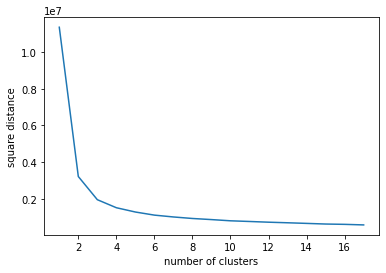

In [11]:
square_distance = []
#the x axis
xrange = list(range(1,18))
for i in range(1,18):
    kmean = KMeans(n_clusters = i)
    kmean.fit(data)
    square_distance.append(kmean.inertia_)
plt.plot(xrange, square_distance)
plt.xlabel("number of clusters")
plt.ylabel("square distance")
plt.show()

As the elbow method show, we could see the optimal cluster is 4

In [12]:
realkmean = KMeans(n_clusters = 4)
data['clusters'] = realkmean.fit_predict(data)
print(data['clusters'])

0      0
1      0
2      0
3      0
4      2
      ..
862    0
863    2
864    2
865    0
866    2
Name: clusters, Length: 867, dtype: int32


In order to visualize all the data in 2D, we apply pca to reduce the features to 2

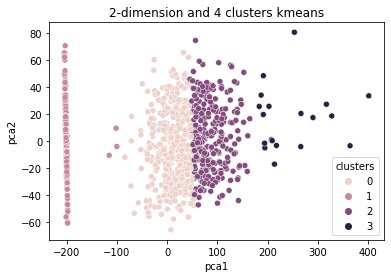

In [13]:
pca_data = PCA(n_components = 2).fit_transform(data)
pca_dataframe = pd.DataFrame(pca_data,columns = ['pca1','pca2'])
sns.scatterplot(x = "pca1", y = "pca2", hue = data['clusters'], data = pca_dataframe)
plt.title("2-dimension and 4 clusters kmeans")
plt.show()